In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
import pandas as pd
#load the data frame
CC_df = pd.read_csv("CC GENERAL.csv")
CC_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
CC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
# find missing
CC_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
#Address Issues where Target Labels ("MINIMUM_PAYMENTS") are missing
CC_df.MINIMUM_PAYMENTS.isnull().sum()

313

In [5]:
CC_df['MINIMUM_PAYMENTS'].fillna(CC_df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [6]:

CC_df['MINIMUM_PAYMENTS'] = CC_df['MINIMUM_PAYMENTS'].fillna(0)

In [7]:

CC_df.drop(['CUST_ID'],axis=1,inplace=True)

 (Q - 1 )Given that K-means depends on distance metric, it is a convention to normalize the data
attributes so that attributes are on the same scale. So, in this first task, normalize all data
attributes

In [8]:
from sklearn import preprocessing
#Data normalization done using MinMax Scaler :                 
mmscaler = preprocessing.MinMaxScaler()

scaled = mmscaler.fit_transform(CC_df)

In [9]:

CC_df = pd.DataFrame(scaled)

(Q - 2) Write your own code for the K-means algorithm using only two attributes, PURCHASES and CREDITLIMIT. Take K=2. Plot clusters on a scatter plot with X and Y being the two attributes. 

In [10]:
import numpy as np
import random
X = CC_df.iloc[:, [3, 13]].values
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100

K=2 #Number of clusters
# Randomly pick k data points as our initial Centroids
Centroids=np.array([]).reshape(n,0) 

for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
        
#Find the distance (Euclidean distance) between each data points in our training set with the K centroids.
for i in range(n_iter):    
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        
    C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
    Y={}
    for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
          Y[k+1]=Y[k+1].T
    
    for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

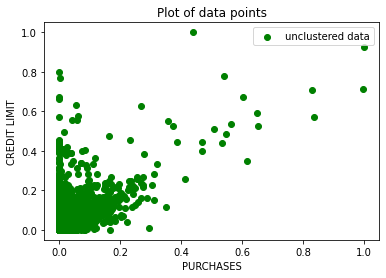

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c='green',label='unclustered data')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT LIMIT')
plt.legend()
plt.title('Plot of data points')
plt.show()

Question-2 :- Color data points belonging to the first cluster with red and the second cluster with blue. Copy the plot diagram in the word document and interpret the output.)

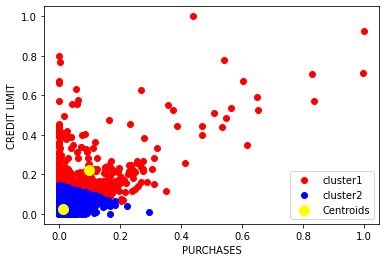

In [12]:
color=['red','blue']
labels=['cluster1','cluster2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT LIMIT')
plt.legend()
plt.show()

Comments - Cluster1 in 'red' and Cluster2 in 'blue', seem to be more meaningfully differentiated but there is no clear separation and there is possibilty of overlapping regions.

Let's check the results using other values of K (Number of Clusters) now to verify whether we can enhance predictions

Question-3. Redo question-2 on different values of K = 3,4,5. For each case, draw the plot of clusters as stated above. Visualize these plots, copy the plot diagrams in the word document, and comment on which is better clustering (and reasons) based on visualization only. [1.5 marks] 

In [13]:
X = CC_df.iloc[:, [3, 13]].values
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100

K=3 #Number of clusters
# Randomly pick k data points as our initial Centroids
Centroids=np.array([]).reshape(n,0) 

for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

#Find the distance (Euclidean distance) between each data points in our training set with the K centroids.
for i in range(n_iter):    
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        
    #Now assign each data point to the closest centroid according to the distance found.
    C=np.argmin(EuclidianDistance,axis=1)+1
     
    Y={}
    for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
          Y[k+1]=Y[k+1].T
    #Update centroid location by taking the average of the points in each cluster group.
    for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

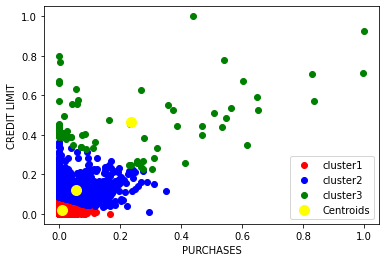

In [14]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT LIMIT')
plt.legend()
plt.show()

Cluster1 in 'red' , Cluster2 in 'blue' and Cluster3 in 'green', seem to be more meaningfully differentiated than before. Let's check the results using other values of K (Number of Clusters) now to verify whether we can enhance predictions

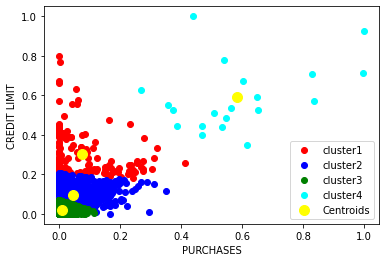

In [15]:
X = CC_df.iloc[:, [3, 13]].values
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100

K=4 #Number of clusters
# Randomly pick k data points as our initial Centroids
Centroids=np.array([]).reshape(n,0) 

for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

#Find the distance (Euclidean distance) between each data points in our training set with the K centroids.
for i in range(n_iter):    
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        
    #Now assign each data point to the closest centroid according to the distance found.
    C=np.argmin(EuclidianDistance,axis=1)+1
     
    Y={}
    for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
          Y[k+1]=Y[k+1].T
    #Update centroid location by taking the average of the points in each cluster group.
    for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y
#plot the clusters
color=['red','blue','green','cyan']
labels=['cluster1','cluster2','cluster3','cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT LIMIT')
plt.legend()
plt.show()

Cluster1 in 'red' , Cluster2 in 'blue' , Cluster3 in 'green', and Cluster4 in 'cyan', seem to be more clearly differentiated than before. With increase in credit limit there is not much significant increase in number of purchases for most of the cases. Let's check the results using other values of K (Number of Clusters) now to verify whether we can enhance predictions

In [16]:
X = CC_df.iloc[:, [3, 13]].values
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100

K=5 #Number of clusters
# Randomly pick k data points as our initial Centroids
Centroids=np.array([]).reshape(n,0) 

for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

#Find the distance (Euclidean distance) between each data points in our training set with the K centroids.
for i in range(n_iter):    
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        
    #Now assign each data point to the closest centroid according to the distance found.
    C=np.argmin(EuclidianDistance,axis=1)+1
     
    Y={}
    for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
          Y[k+1]=Y[k+1].T
    #Update centroid location by taking the average of the points in each cluster group.
    for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

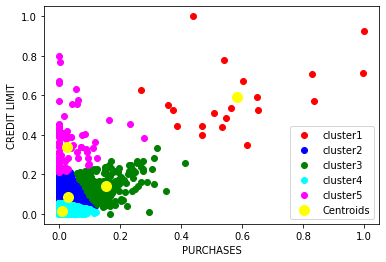

In [17]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT LIMIT')
plt.legend()
plt.show()

Cluster 1: High user of credit card, likely has high income as balance isn’t that high but spends quite a lot.


Cluster 2: Mid user of credit card, but only buys low value goods.


Cluster 3: Mid user of credit card, tendency to buy large value goods but not great at paying it back as still high balance.


Cluster 4: Mid user of credit card, tends to buy low value goods but not great at paying back.


Cluster 5: High user of credit card, however doesn’t purchase goods that are high in value. Keeps balance low.

#### Key findings:
– The more purchases a customer makes, the more likely they will have had a larger one off purchase.


-- Customers who make more purchases also make more payments. 

-- Customers with higher credit balances are more likely to have a higher credit limit and also have more cash advances.

Q 4. Use the code written by you to cluster the data using all the features in the dataset. Take k=5 for this.

In [27]:
X = scaled #CC_df.values
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100

K=5 #Number of clusters
Centroids=np.array([]).reshape(n,0) 

for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

#Find the distance (Euclidean distance) between each data points in our training set with the K centroids.
for i in range(n_iter):    
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        
    C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
    Y={}
    for k in range(K):
          Y[k+1]=np.array([]).reshape(17,0)
    for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
          Y[k+1]=Y[k+1].T
    
    for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

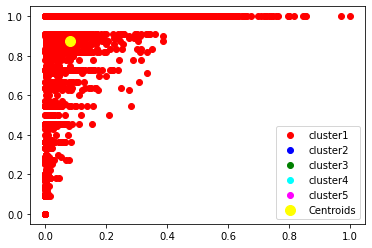

In [26]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
#plt.xlabel('PURCHASES')
#plt.ylabel('CREDIT LIMIT')
plt.legend()
plt.show()

###### Conclusion : are able to build a clustering model that was able to segment our credit card users into distinctive groups. Some of these were fairly classical such as the prime segment, revolvers and transactors but we were also able to identify inactive users. Understanding the behaviour of customers at this level of granularity is key to tailoring offers which improve customer retention and drive revenues. 

#### Key findings:
– The more purchases a customer makes, the more likely they will have had a larger one off purchase.


-- Customers who make more purchases also make more payments. 

-- Customers with higher credit balances are more likely to have a higher credit limit and also have more cash advances.